In [ ]:
import tensorflow as tf
assert tf.__version__.startswith('2')

import os
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import feature_column
from tensorflow.keras import layers
from matplotlib import pyplot as plt

# The following lines adjust the granularity of reporting.
pd.options.display.max_rows = 10
pd.options.display.float_format = "{:.1f}".format
# tf.keras.backend.set_floatx('float32')

print("Ran the import statements.")

Ran the import statements.


In [ ]:
tf.__version__

'2.2.0'

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
!ls "/content/gdrive/My Drive/classification-regression/"

datasets_11167_15520_test.csv  datasets_11167_15520_train.csv


In [ ]:
PATH = "/content/gdrive/My Drive/classification-regression/"

In [ ]:
os.listdir(PATH)

['datasets_11167_15520_train.csv', 'datasets_11167_15520_test.csv']

In [ ]:
train_dir = os.path.join(PATH,'datasets_11167_15520_train.csv')
test_dir = os.path.join(PATH,'datasets_11167_15520_test.csv')

In [ ]:
train_df = pd.read_csv(train_dir)
test_df = pd.read_csv(test_dir)
train_df = train_df.reindex(np.random.permutation(train_df.index)) # shuffle the training set

In [ ]:
train_df.head(20) 

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
564,574,0,2.8,1,16,0,38,0.1,90,6,17,286,1171,3269,8,7,10,0,1,0,2
1554,1957,0,1.2,1,18,1,36,0.8,151,2,19,1194,1727,1115,16,2,18,1,0,1,1
1249,504,1,2.8,1,2,0,54,0.4,163,2,10,1207,1539,2378,17,11,2,1,0,0,2
389,1712,0,1.4,0,1,0,63,0.5,137,7,12,747,1126,3652,16,1,19,1,0,0,3
1547,1611,0,0.5,1,4,1,27,0.9,199,1,10,163,1011,3078,15,2,6,1,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1109,1542,0,2.3,0,1,0,43,0.8,182,2,11,346,966,3601,14,4,16,0,0,0,3
1369,818,0,0.5,1,2,1,23,0.2,192,5,17,586,1552,2518,19,12,3,1,1,0,2
1552,1562,1,0.7,0,0,0,55,0.1,140,8,1,1032,1776,2096,15,3,3,0,0,0,2
225,1634,1,1.4,0,1,1,17,0.2,200,2,5,964,1677,3031,11,6,6,1,1,1,3


In [ ]:
print(train_df.isna().sum())

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
                ..
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
Length: 21, dtype: int64


In [ ]:
# Calculate the Z-scores of each column in the training set and
# write those Z-scores into a new pandas DataFrame named train_df_norm.
train_df_mean = train_df.mean()
train_df_std = train_df.std()
train_df_norm = (train_df - train_df_mean)/train_df_std
train_df_norm['blue'] = train_df['blue']
train_df_norm['dual_sim'] = train_df['dual_sim']
train_df_norm['four_g'] = train_df['four_g']
train_df_norm['three_g'] = train_df['three_g']
train_df_norm['touch_screen'] = train_df['touch_screen']
train_df_norm['wifi'] = train_df['wifi']
train_df_norm['price_range'] = train_df['price_range']

In [ ]:
train_df_norm.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
564,-1.5,0,1.6,1,2.7,0,0.3,-1.4,-1.4,0.6,1.2,-0.8,-0.2,1.1,-1.0,0.3,-0.2,0,1,0,2
1554,1.6,0,-0.4,1,3.2,1,0.2,1.0,0.3,-1.1,1.5,1.2,1.1,-0.9,0.9,-0.9,1.3,1,0,1,1
1249,-1.7,1,1.6,1,-0.5,0,1.2,-0.4,0.6,-1.1,0.0,1.3,0.7,0.2,1.1,1.2,-1.6,1,0,0,2
389,1.1,0,-0.1,0,-0.8,0,1.7,-0.0,-0.1,1.1,0.3,0.2,-0.3,1.4,0.9,-1.1,1.5,1,0,0,3
1547,0.8,0,-1.3,1,-0.1,1,-0.3,1.4,1.7,-1.5,0.0,-1.1,-0.6,0.9,0.6,-0.9,-0.9,1,0,1,2


In [ ]:
train_df_norm.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0
mean,0.0,0.5,-0.0,0.5,0.0,0.5,-0.0,-0.0,0.0,-0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,0.0,0.8,0.5,0.5,1.5
std,1.0,0.5,1.0,0.5,1.0,0.5,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.4,0.5,0.5,1.1
min,-1.7,0.0,-1.3,0.0,-1.0,0.0,-1.7,-1.4,-1.7,-1.5,-1.6,-1.5,-1.7,-1.7,-1.7,-1.3,-1.6,0.0,0.0,0.0,0.0
25%,-0.9,0.0,-1.0,0.0,-0.8,0.0,-0.9,-1.0,-0.9,-0.7,-0.8,-0.8,-0.9,-0.8,-0.8,-0.9,-0.9,1.0,0.0,0.0,0.8
50%,-0.0,0.0,-0.0,1.0,-0.3,1.0,-0.0,-0.0,0.0,-0.2,0.0,-0.2,-0.0,0.0,-0.1,-0.2,-0.0,1.0,1.0,1.0,1.5
75%,0.9,1.0,0.8,1.0,0.6,1.0,0.9,1.0,0.8,1.1,0.8,0.7,0.9,0.9,0.9,0.7,0.9,1.0,1.0,1.0,2.2
max,1.7,1.0,1.8,1.0,3.4,1.0,1.8,1.7,1.7,1.5,1.7,3.0,1.7,1.7,1.6,2.8,1.6,1.0,1.0,1.0,3.0


In [ ]:
train_df_norm.corr()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
battery_power,1.0,0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0,0.1,0.0,-0.0,-0.0,0.2
blue,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,0.0,-0.0,-0.0,-0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,-0.0,0.0
clock_speed,0.0,0.0,1.0,-0.0,-0.0,-0.0,0.0,-0.0,0.0,-0.0,-0.0,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,-0.0,0.0,-0.0,-0.0
dual_sim,-0.0,0.0,-0.0,1.0,-0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0
fc,0.0,0.0,-0.0,-0.0,1.0,-0.0,-0.0,-0.0,0.0,-0.0,0.6,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,0.0,-0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
talk_time,0.1,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,-0.0,1.0,-0.0,0.0,-0.0,0.0
three_g,0.0,-0.0,-0.0,-0.0,0.0,0.6,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0,0.0,-0.0,1.0,0.0,0.0,0.0
touch_screen,-0.0,0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,0.0,-0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0,1.0,0.0,-0.0
wifi,-0.0,-0.0,-0.0,0.0,0.0,-0.0,0.0,-0.0,-0.0,-0.0,0.0,0.1,0.0,0.0,0.0,0.0,-0.0,0.0,0.0,1.0,0.0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [ ]:
# Divide data into features X and target (Classes) Y
X = train_df_norm.iloc[:,:-1]
Y = train_df_norm.iloc[:,-1]
#Y = pd.get_dummies(Y)
print(X.shape)
print(Y.shape)

(2000, 20)
(2000,)


In [ ]:
enc = OneHotEncoder()
Y = enc.fit_transform(Y[:, np.newaxis]).toarray()

In [ ]:
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=2)

In [ ]:
n_features = X.shape[1]
n_classes = Y.shape[1]
print(n_classes)

4


In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(32, input_dim = n_features, activation = 'relu'))
#model.add(tf.keras.layers.Dense(16, activation = 'relu'))
model.add(tf.keras.layers.Dense(n_classes, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                672       
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 132       
Total params: 804
Trainable params: 804
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='categorical_crossentropy', 
                      optimizer='adam', 
                      metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, Y_train,
                                 batch_size=5,
                                 epochs=10,
                                 verbose=1,
                                 validation_data=(X_test, Y_test)
)

Epoch 1/10
320/320 [==============================] - 1s 3ms/step - loss: 1.3198 - accuracy: 0.4100 - val_loss: 1.0591 - val_accuracy: 0.5575
Epoch 2/10
320/320 [==============================] - 1s 3ms/step - loss: 0.8867 - accuracy: 0.6575 - val_loss: 0.7394 - val_accuracy: 0.7450
Epoch 3/10
320/320 [==============================] - 1s 3ms/step - loss: 0.6362 - accuracy: 0.7781 - val_loss: 0.5523 - val_accuracy: 0.8325
Epoch 4/10
320/320 [==============================] - 1s 3ms/step - loss: 0.4904 - accuracy: 0.8600 - val_loss: 0.4435 - val_accuracy: 0.8725
Epoch 5/10
320/320 [==============================] - 1s 3ms/step - loss: 0.3974 - accuracy: 0.9006 - val_loss: 0.3771 - val_accuracy: 0.9025
Epoch 6/10
320/320 [==============================] - 1s 3ms/step - loss: 0.3339 - accuracy: 0.9169 - val_loss: 0.3241 - val_accuracy: 0.9050
Epoch 7/10
320/320 [==============================] - 1s 3ms/step - loss: 0.2884 - accuracy: 0.9294 - val_loss: 0.2933 - val_accuracy: 0.9100
Epoch 

In [ ]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.2242705225944519
Test accuracy: 0.9325000047683716


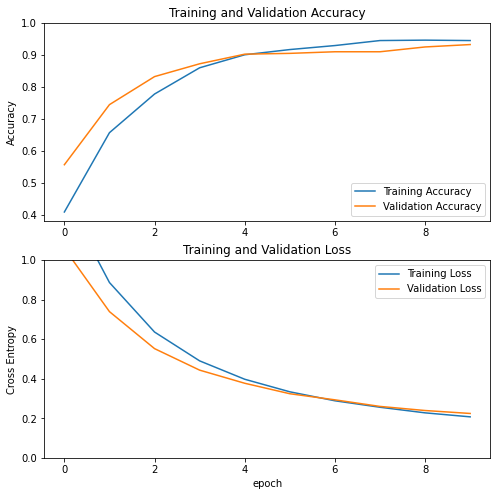

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
#Y_pred = model.predict(X_test)
Y_pred = np.argmax(model.predict(X_test), axis=-1)
Y_decode = np.argmax(Y_test, axis=1)
print(Y_pred)
print(Y_decode)

[3 2 2 2 0 3 2 1 2 1 1 1 2 0 0 1 0 3 1 0 3 3 0 1 2 0 0 0 1 0 3 1 3 2 0 2 0
 0 0 3 1 1 2 2 2 3 0 1 0 3 0 0 2 0 0 0 3 1 1 2 2 1 0 2 0 2 3 3 0 1 2 2 2 0
 1 2 0 2 0 0 1 1 1 2 1 2 3 0 0 3 1 0 3 3 3 1 1 2 1 3 0 3 2 2 3 0 2 2 0 0 1
 3 2 1 3 0 3 3 0 0 2 1 0 0 1 0 3 1 3 3 3 2 3 3 2 0 0 2 0 1 1 0 3 2 2 3 2 3
 3 0 1 3 2 3 1 1 1 0 0 0 2 1 1 0 2 2 1 2 3 3 2 1 3 1 3 2 1 1 2 2 0 2 3 0 0
 1 3 2 2 0 2 2 3 0 2 2 0 1 2 0 2 2 2 2 3 2 1 1 1 3 3 2 3 3 0 1 1 3 2 0 0 0
 3 3 0 3 2 1 1 3 1 0 0 3 3 2 1 1 0 1 2 0 1 3 0 1 3 3 0 3 3 2 0 0 2 2 3 1 2
 0 2 1 0 2 0 2 1 1 1 1 1 0 0 1 3 0 3 1 3 0 2 3 1 0 2 1 1 3 0 3 3 0 1 0 2 0
 1 0 1 0 1 0 3 0 1 3 0 1 1 1 0 0 2 2 2 1 1 3 0 1 2 0 2 0 2 0 0 1 0 3 2 3 2
 0 2 1 0 3 3 0 2 1 2 0 0 0 1 1 2 0 1 0 1 2 0 0 3 3 2 3 3 2 1 1 2 3 0 1 3 1
 3 3 3 1 0 0 2 1 3 3 3 2 2 1 1 0 2 1 3 2 0 1 2 3 1 3 3 1 2 1]
[3 2 2 2 0 3 2 1 2 1 1 1 2 0 0 1 0 3 1 0 3 2 0 1 2 0 0 0 1 0 3 1 3 2 0 2 0
 0 0 3 1 1 2 2 2 3 0 1 0 3 0 0 2 0 0 0 3 1 1 2 2 1 0 2 0 2 3 3 0 1 2 2 2 0
 1 2 0 2 0 0 1 0 1 2 1 2 3 0 0 3 1 0 3

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

Accuracy: 0.932500
Precision: 0.932500
Recall: 0.932500
F1 score: 0.932500
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       107
           1       0.91      0.93      0.92        99
           2       0.92      0.90      0.91        99
           3       0.96      0.93      0.94        95

    accuracy                           0.93       400
   macro avg       0.93      0.93      0.93       400
weighted avg       0.93      0.93      0.93       400



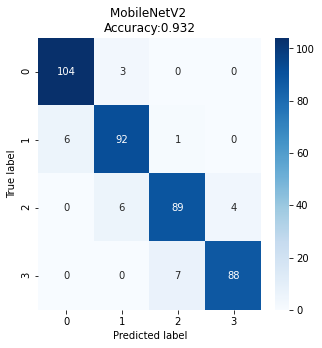

In [ ]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

# accuracy: (tp + tn) / (p + n)
accuracy = accuracy = accuracy_score(Y_decode, Y_pred)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(Y_decode, Y_pred,  average='micro')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(Y_decode, Y_pred,  average='micro')
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(Y_decode, Y_pred, average='micro')
print('F1 score: %f' % f1)
# confusion matrix
matrix = confusion_matrix(Y_decode, Y_pred)
#print(matrix)
print(classification_report(Y_decode, Y_pred))

cm_df = pd.DataFrame(matrix,
                     index = ['0','1','2', '3'], 
                     columns = ['0','1','2', '3'])

plt.figure(figsize=(5,5))
sn.heatmap(cm_df, annot=True,cmap='Blues', fmt='g')
plt.title('MobileNetV2 \nAccuracy:{0:.3f}'.format(accuracy_score(Y_decode, Y_pred)))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()